**R F M** : grouping data to based on __*Recency, Frequency, Monetize*__) to get insights on specific characteristic of each  groups over other parameter.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_excel('Superstore Indonesia.xls')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34196 entries, 0 to 34195
Data columns (total 24 columns):
Row               34196 non-null int64
Order ID          34196 non-null object
Order Date        34196 non-null datetime64[ns]
Ship Date         34196 non-null datetime64[ns]
Ship Mode         34196 non-null object
Customer ID       34196 non-null object
Customer Name     34196 non-null object
Segment           34196 non-null object
City              34196 non-null object
State             34196 non-null object
Global Area       34196 non-null object
Postal Code       6663 non-null float64
Market            34196 non-null object
Region            34196 non-null object
Product ID        34196 non-null object
Category          34196 non-null object
Sub-Category      34196 non-null object
Product Name      34196 non-null object
Sales             34196 non-null float64
Quantity          34196 non-null int64
Discount          34196 non-null float64
Profit            34196 non-null fl

,Row,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,MX-2014-143658,2014-10-02,2014-10-06,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,...,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.033,Medium
1,2,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.449,Medium
2,4,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.371,Medium
3,5,MX-2012-155047,2012-10-15,2012-10-20,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.787,Medium
4,7,MX-2013-134096,2013-09-27,2013-10-01,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,...,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0.0,21.32,4.108,Medium


- we order by `Customer ID`
- __R__ recency -> get diff between the most recent in data and the instance
- __F__ frequenct -> count the transaction dealt by customer
- __M__ monetize -> count the total expense which is the sum of multiplication between `Sales` and `Quantity`

In [4]:
now = data['Order Date'].max()
data['Total'] = data.apply(lambda col: col['Sales']*col['Quantity'], axis=1)

In [6]:
data['Order Date'].describe()

count                   34196
unique                   1424
top       2014-06-18 00:00:00
freq                       89
first     2011-01-01 00:00:00
last      2014-12-31 00:00:00
Name: Order Date, dtype: object

In [7]:
rfm_data = data.groupby('Customer ID')\
                .agg({'Order Date': lambda x: (now-x.max()).days,
                      'Order ID': len,
                      'Total' : sum})\
                .rename(columns={'Order Date': 'R',
                                 'Order ID': 'F',
                                 'Total': 'M'})

print(rfm_data.info())
print(rfm_data.describe())
rfm_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1588 entries, AA-10315 to ZD-21925
Data columns (total 3 columns):
R    1588 non-null int64
F    1588 non-null int64
M    1588 non-null float64
dtypes: float64(1), int64(2)
memory usage: 49.6+ KB
None
                 R            F              M
count  1588.000000  1588.000000    1588.000000
mean    105.832494    21.534005   26003.326901
std     155.167904    14.743793   26971.371828
min       0.000000     1.000000       7.173000
25%      18.000000     8.000000    2988.188250
50%      42.000000    18.000000   18524.685460
75%     125.000000    35.000000   41773.162000
max    1309.000000    66.000000  166335.526480


,R,F,M
Customer ID,,,
AA-10315,128,24,30490.44450
AA-10375,6,29,17165.04800
AA-10480,125,28,67695.66900
AA-10645,37,48,55388.58614
AA-315,2,4,357.13200


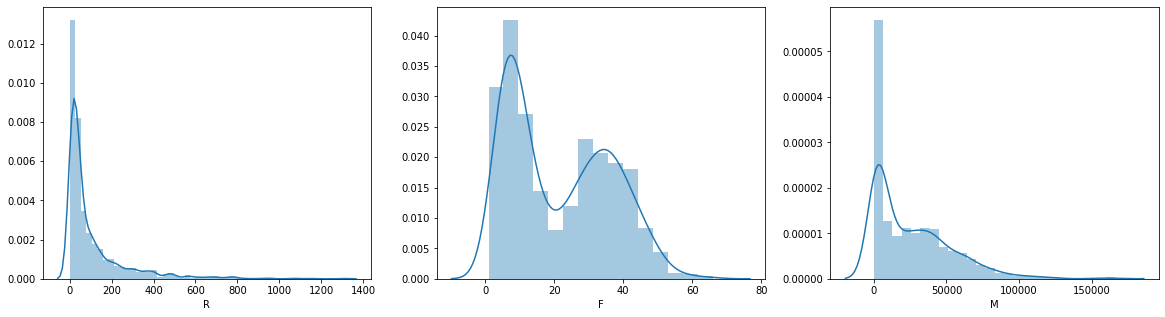

In [8]:
fig, ax = plt.subplots(1,3, figsize=(20, 5))
sns.distplot(rfm_data['R'], ax=ax[0])
sns.distplot(rfm_data['F'], ax=ax[1])
sns.distplot(rfm_data['M'], ax=ax[2])

In this case we will divide the value into __5__ groups. We might re-reduce the grouping later depends on the result, later on further analysis can be done through this grouping.

In [9]:
q5 = rfm_data.quantile([0, 0.2, 0.4, 0.6, 1], axis=0)
ref = {'R' : q5['R'].tolist(), 'F': q5['F'].tolist(), 'M': q5['M'].tolist()}
ref

{'R': [0.0, 13.0, 32.0, 61.0, 1309.0],
 'F': [1.0, 7.0, 12.0, 27.0, 66.0],
 'M': [7.173000000000001,
  1987.4448000000004,
  8562.524400000006,
  27754.379764000005,
  166335.52648]}

In [10]:
def to_q(num, x):
    if num < ref[x][0]:
        return 1
    elif num < ref[x][1]:
        return 2
    elif num < ref[x][2]:
        return 3
    elif num < ref[x][3]:
        return 4
    else:
        return 5
    
rfm_data['R'] = rfm_data['R'].apply(lambda x: to_q(x,'R'))
rfm_data['F'] = rfm_data['F'].apply(lambda x: to_q(x,'F'))
rfm_data['M'] = rfm_data['M'].apply(lambda x: to_q(x,'M'))
rfm_data

,R,F,M
Customer ID,,,
AA-10315,5,4,5
AA-10375,2,5,4
AA-10480,5,5,5
AA-10645,4,5,5
AA-315,2,2,2
...,...,...,...
YS-21880,5,5,5
ZC-11910,5,2,2
ZC-21910,2,5,5
